In [124]:
import numpy as np 
import matplotlib.pyplot as plt 

In [136]:
x = [1,2,3,4]
y = [3,2,0,5]

(0.0, 5.0, 0.0, 8.0)

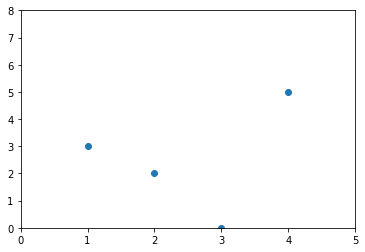

In [137]:
plt.scatter(x,y)
plt.axis([0,5,0,8])

In [138]:
#For linear case
#Variable names used for linear, A1, A2, A, C, yhat
A1 = np.zeros((4,1))
A2 = np.zeros((4,1))
A1 = np.array(x).reshape((4,1))
A2.fill(1)
A = np.concatenate((A1,A2), axis=1)

In [139]:
#Making sure inputs, outputs and model parameters are of correct shape 
Y = np.array(y).reshape((4,1))
X = np.array(x).reshape((4,1))
C = np.zeros((2,1))

In [140]:
#Parameters for linear case, k=2
C = np.linalg.inv(A.T@A)@(A.T@Y)


In [141]:
#Indexing to separate model parameters 
m = C[0][0]
b = C[1][0]

print(b,m)

1.4999999999999982 0.39999999999999947


In [142]:
#Shaping predictions
yhat = np.zeros((4,1))
x = np.array(x).reshape((4,1))

In [143]:
#Running predictions for linear case
yhat = (m * x) + b

In [160]:
#Variable names for quadratic. B1,B2,B3, B, D, yhatquad
B1 = X**2
B2 = X
B3 = np.zeros((4,1))
B3.fill(1)
B = np.concatenate((B1,B2,B3), axis = 1)

array([[ 1.,  1.,  1.],
       [ 4.,  2.,  1.],
       [ 9.,  3.,  1.],
       [16.,  4.,  1.]])

In [159]:
D = np.zeros((3,1))
D = np.linalg.inv(B.T@B)@(B.T@Y)
aquad = D[0][0] #Ax^2
bquad = D[1][0] #Bx
cquad = D[2][0] #C
yhatquad = aquad*(X**2) + bquad*X + cquad
D

array([[ 1.5],
       [-7.1],
       [ 9. ]])

In [150]:
#Variable names for polynomial, E1,E2,E3,E4,E,F, yhatpoly 
E1 = X**3
E2 = X**2
E3 = X
E4 = np.zeros((4,1))
E4.fill(1)

E = np.concatenate((E1,E2,E3,E4), axis = 1)

In [158]:
F = np.zeros((4,1))
F = np.linalg.inv(E.T@E)@(E.T@Y)
apoly = F[0][0] 
bpoly = F[1][0] 
cpoly = F[2][0] 
dpoly = F[3][0] 

F

y =0.4X + 1.5
y = 1.5X**2 - 7.1X + 9 
y = 1.3X**3 - 8.5X**2 + 15.2X -5  

array([[ 1.33333333],
       [-8.5       ],
       [15.16666667],
       [-5.        ]])

In [152]:
yhatpoly = apoly*(X**3) + bpoly*(X**2) + cpoly*X + dpoly

In [153]:
#Mean squared error function
def MSEnp(y,yhat,n):
    sqrdiff = (y - yhat)**2
    SSE = np.sum(sqrdiff)
    meanSE = SSE/n
    return meanSE

In [154]:
MSElinear = MSEnp(Y, yhat, 4)
MSEquad = MSEnp(Y, yhatquad, 4)
MSEpoly = MSEnp(Y, yhatpoly, 4)
MSElinear, MSEquad, MSEpoly

(3.0500000000000003, 0.8, 1.936735563851727e-23)

In [155]:
#Now plug in for all values of X from 0-5
Xcoords = np.arange(0,5,0.1) 

yhat  = m * Xcoords + b
yhatquad = aquad*(Xcoords**2) + bquad*Xcoords + cquad
yhatpoly = apoly*(Xcoords**3) + bpoly*(Xcoords**2) + cpoly*Xcoords + dpoly 

Text(0, 0.5, 'Y')

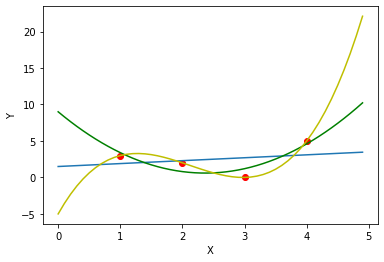

In [157]:
plt.plot(x,y,'ro',Xcoords,yhat, Xcoords, yhatquad, 'g-', Xcoords, yhatpoly,'y-')
plt.xlabel('X')
plt.ylabel('Y')